In [822]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

In [823]:
#prepare the dataset
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [824]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [825]:
#data statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [826]:
#check missing data
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [827]:
# Replace zeros with NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

<Axes: >

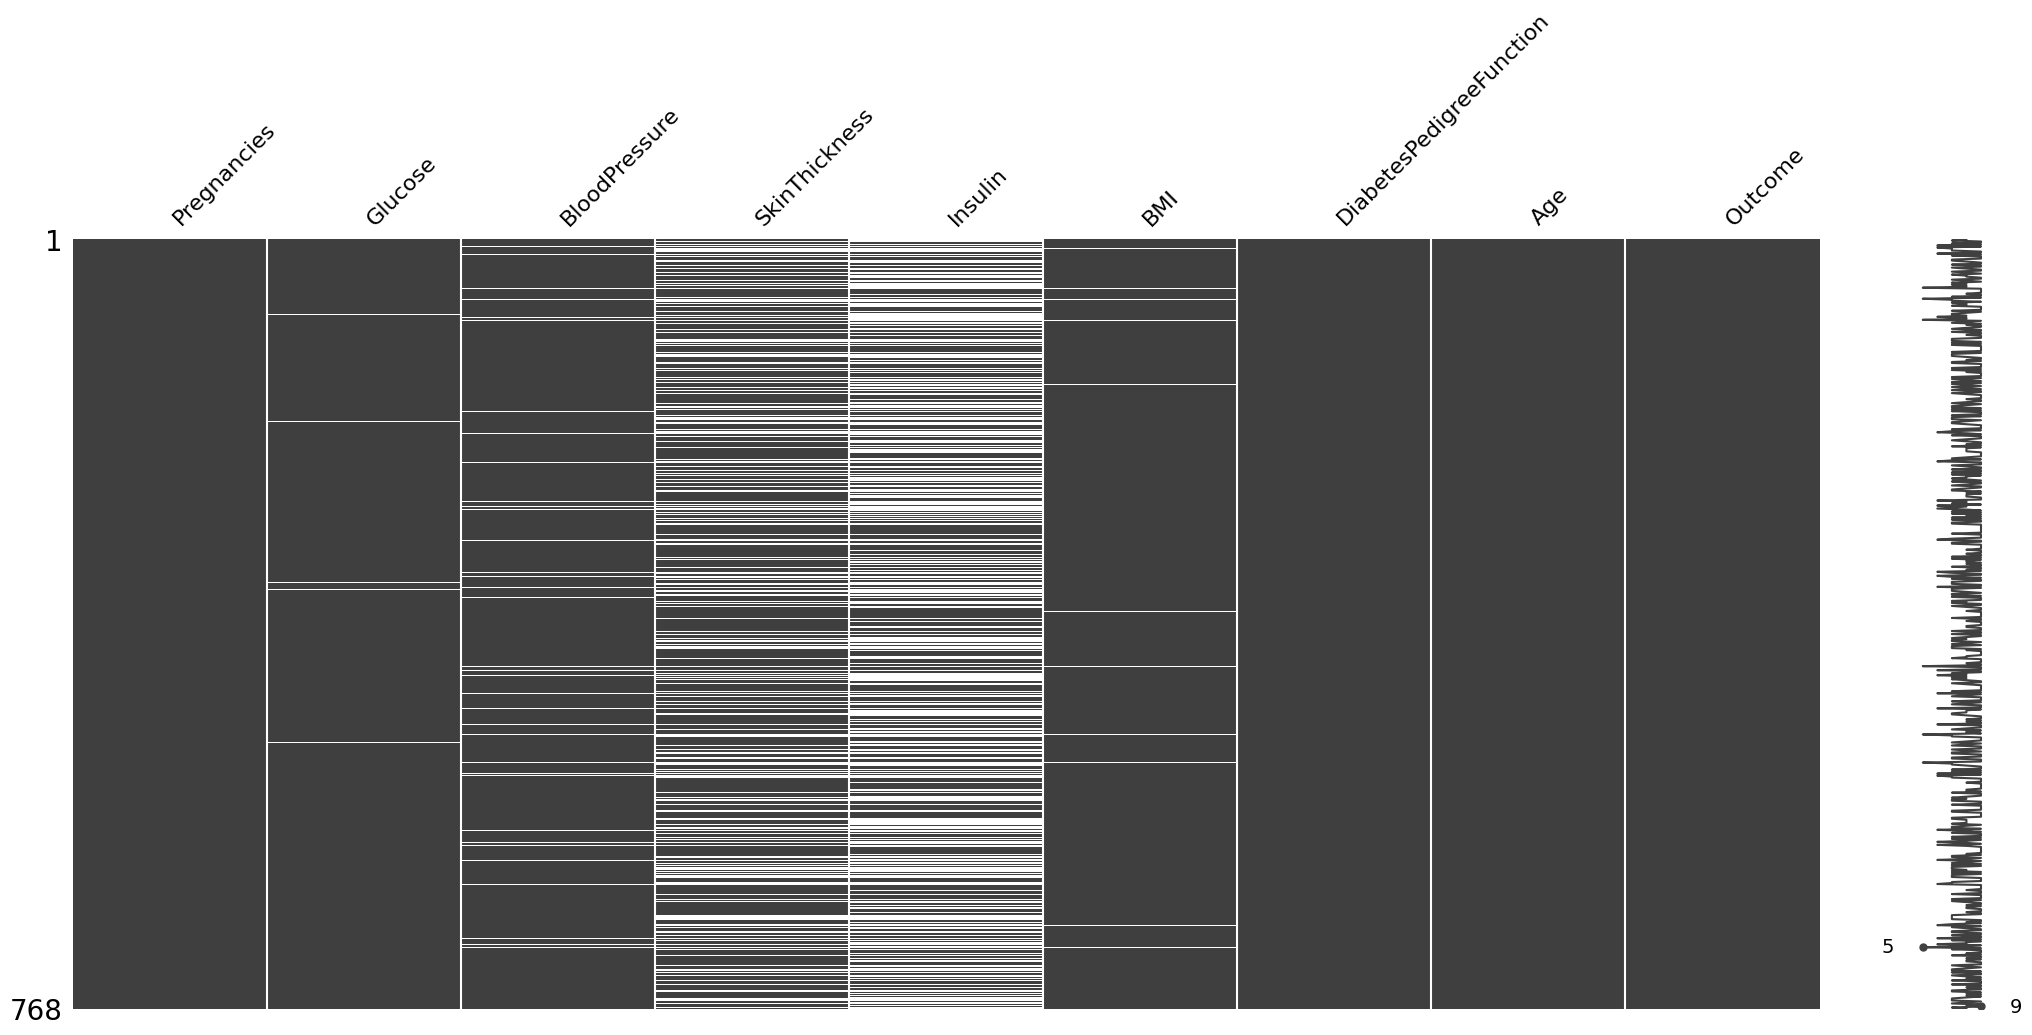

In [828]:
# Visualize missing values as a matrix
msno.matrix(df) 

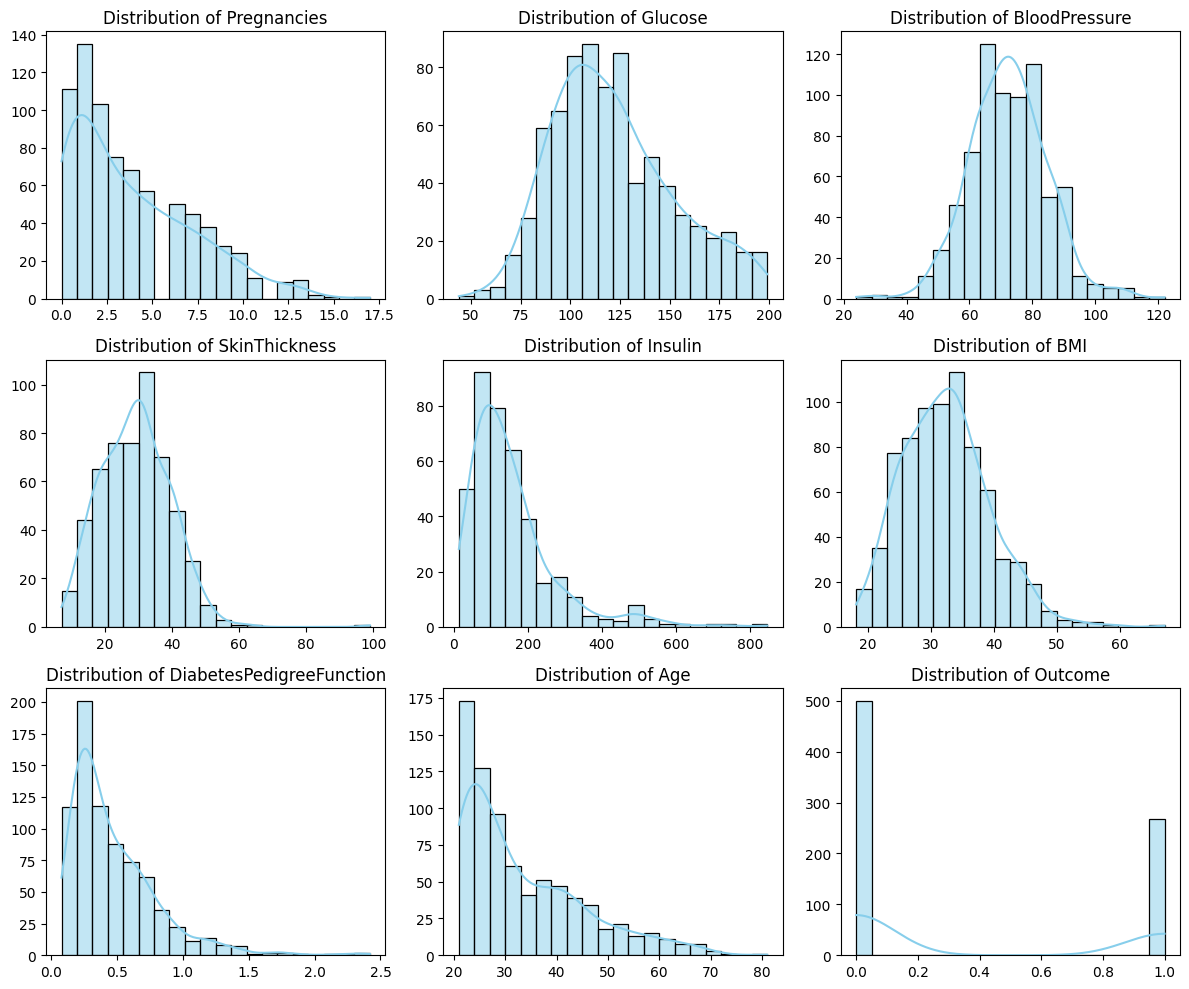

In [829]:
#Distribution of every column
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], kde=True, color='skyblue', bins=20)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
plt.tight_layout()
plt.show()

In [830]:
# Filling the missing values
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)

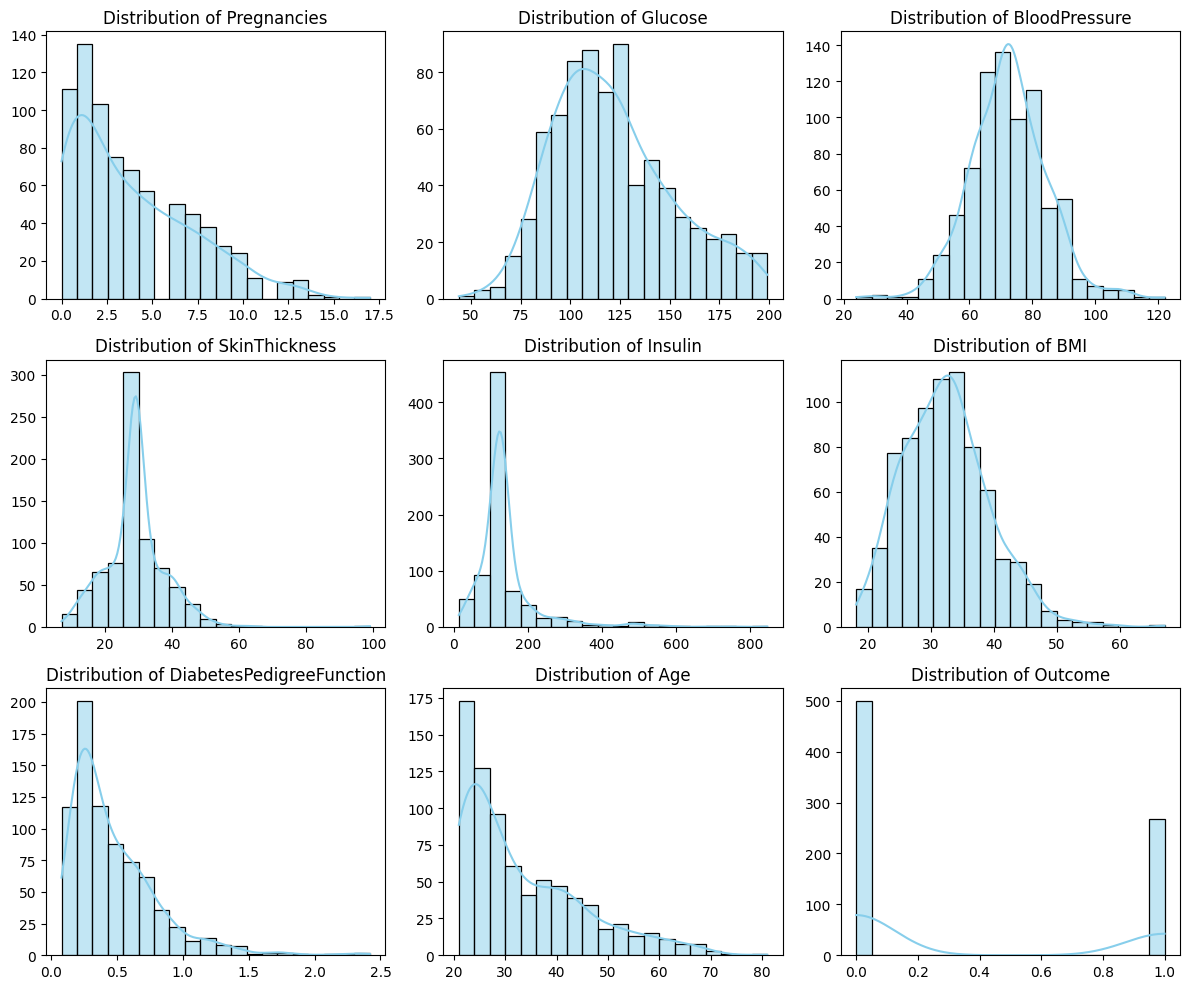

In [831]:
#Distribution of every column
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], kde=True, color='skyblue', bins=20)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
plt.tight_layout()
plt.show()

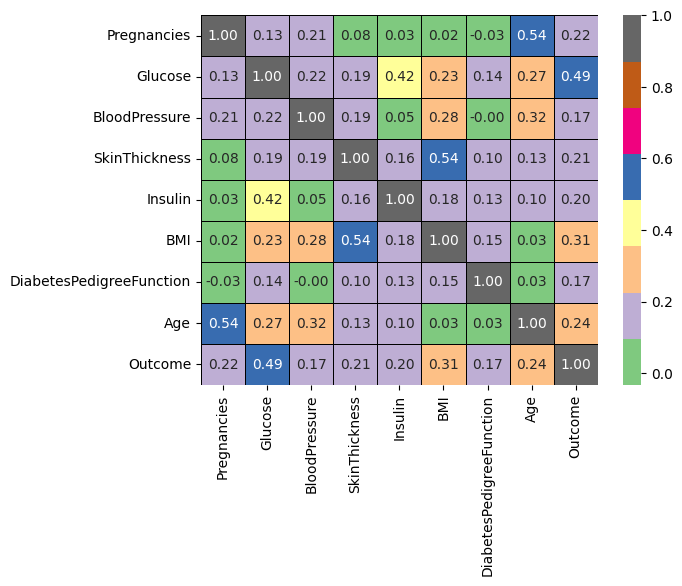

In [832]:
#create the correlation heatmap every parameter
plt.figure(dpi=100)
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor="black", fmt=".2f", cmap="Accent")
plt.show()

In [833]:
#create the pairplot
#plt.figure(dpi=100)
#sns.pairplot(df, hue='Outcome', palette='Accent_r')

In [834]:
#Split dataset menjadi 2: data training dan data testing
x = df.drop('Outcome',axis=1) #feature
y = df['Outcome'] #target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)
method_names = []
test_accuracies_scores = []
roc_auc_scores = []

#### Building the Model

##### Logistic Regression

In [835]:
#Model 1: Logistic Regression

log = LogisticRegression()
log_model = log.fit(x_train, y_train)
y_pred = log_model.predict(x_test)

print("-----Test Data Model Evaluation-----")
print()

#evaluasi model dengan confusion matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()

# Print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

# Print accuracy score
print(f"Accuracy score on Test Data: {accuracy_score(y_test,y_pred):.3f}")

#append accuracies on new list
method_names.append("Logistic Regression")
test_accuracies_scores.append(accuracy_score(y_test,y_pred))

# Area under ROC curve
y_pred_proba = log_model.predict_proba(x_test)[:,1]

# Print ROC AUC score
print(f"ROC AUC score on Test Data: {roc_auc_score(y_test,y_pred_proba):.3f}")

# Append score to list
roc_auc_scores.append(roc_auc_score(y_test,y_pred_proba))

-----Test Data Model Evaluation-----

Confusion Matrix:
 [[83 16]
 [19 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

Accuracy score on Test Data: 0.773
ROC AUC score on Test Data: 0.831


##### K-Nearest Neighbor

In [836]:
#Model 2: K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

print("-----Test Data Model Evaluation-----")
print()

#evaluasi model dengan confusion matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()

# Print classification report
print('Classification Report:\n',classification_report(y_test,y_pred))

# Print accuracy score
print(f"Accuracy score on Test Data: {accuracy_score(y_test,y_pred):.3f}")

# Append score list
method_names.append("KNN")
test_accuracies_scores.append(accuracy_score(y_test,y_pred))

# Area under ROC curve
y_pred_proba = knn_model.predict_proba(x_test)[:,1]

# Print ROC AUC score
print(f"ROC AUC score on Test Data: {roc_auc_score(y_test,y_pred_proba):.3f}")

# Append score to list
roc_auc_scores.append(roc_auc_score(y_test,y_pred_proba))

-----Test Data Model Evaluation-----

Confusion Matrix:
 [[69 30]
 [21 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.70      0.73        99
           1       0.53      0.62      0.57        55

    accuracy                           0.67       154
   macro avg       0.65      0.66      0.65       154
weighted avg       0.68      0.67      0.67       154

Accuracy score on Test Data: 0.669
ROC AUC score on Test Data: 0.712


##### Decision Tree

In [837]:
#Model 3: Decision Tree
dectree = DecisionTreeClassifier()
dt_model = dectree.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

print("-----Test Data Model Evaluation-----")
print()

#evaluasi model dengan confusion matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()

# Print classification report
print('Classification Report:\n',classification_report(y_test,y_pred))

# Print accuracy score
print(f"Accuracy score on Test Data: {accuracy_score(y_test,y_pred):.3f}")

#append accuracies on new list
method_names.append("Decision Tree")
test_accuracies_scores.append(accuracy_score(y_test,y_pred))

# Area under ROC curve
y_pred_proba = dt_model.predict_proba(x_test)[:,1]

# Print ROC AUC score
print(f"ROC AUC score on Test Data: {roc_auc_score(y_test,y_pred_proba):.3f}")

# Append score to list
roc_auc_scores.append(roc_auc_score(y_test,y_pred_proba))

-----Test Data Model Evaluation-----

Confusion Matrix:
 [[73 26]
 [19 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154

Accuracy score on Test Data: 0.708
ROC AUC score on Test Data: 0.696


##### Random Forest

In [838]:
#Model 4: Random Forest
random_forest = RandomForestClassifier()
rf_model = random_forest.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
print("-----Test Data Model Evaluation-----")
print()

#evaluasi model dengan confusion matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()

# Print classification report
print('Classification Report:\n',classification_report(y_test,y_pred))

# Print accuracy score
print(f"Accuracy score on Test Data: {accuracy_score(y_test,y_pred):.3f}")

#append accuracies on new list
method_names.append("Random Forest")
test_accuracies_scores.append(accuracy_score(y_test,y_pred))

# Area under ROC curve
y_pred_proba = rf_model.predict_proba(x_test)[:,1]

# Print ROC AUC score
print(f"ROC AUC score on Test Data: {roc_auc_score(y_test,y_pred_proba):.3f}")

# Append score to list
roc_auc_scores.append(roc_auc_score(y_test,y_pred_proba))

-----Test Data Model Evaluation-----

Confusion Matrix:
 [[82 17]
 [17 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        99
           1       0.69      0.69      0.69        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154

Accuracy score on Test Data: 0.779
ROC AUC score on Test Data: 0.840


##### Support Vector Machine

In [839]:
#Model 5: Support Vector Machine
svc = SVC(probability=True)
svm_model = svc.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
print("-----Test Data Model Evaluation-----")
print()

#evaluasi model dengan confusion matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()

# Print classification report
print('Classification Report:\n',classification_report(y_test,y_pred))

# Print accuracy score
print(f"Accuracy score on Test Data: {accuracy_score(y_test,y_pred):.3f}")

#append accuracies on new list
method_names.append("SVM")
test_accuracies_scores.append(accuracy_score(y_test,y_pred))

# Area under ROC curve
y_pred_proba = svm_model.predict_proba(x_test)[:,1]

# Print ROC AUC score
print(f"ROC AUC score on Test Data: {roc_auc_score(y_test,y_pred_proba):.3f}")

# Append score to list
roc_auc_scores.append(roc_auc_score(y_test,y_pred_proba))

-----Test Data Model Evaluation-----

Confusion Matrix:
 [[87 12]
 [24 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

Accuracy score on Test Data: 0.766
ROC AUC score on Test Data: 0.802


##### Naive Bayes

In [840]:
#Model 6: Naive Bayes
naive_bayes = GaussianNB()
nb_model = naive_bayes.fit(x_train,y_train)
y_pred = nb_model.predict(x_test)
print("-----Test Data Model Evaluation-----")
print()

#evaluasi model dengan confusion matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()

# Print classification report
print('Classification Report:\n',classification_report(y_test,y_pred))

# Print accuracy score
print(f"Accuracy score on Test Data: {accuracy_score(y_test,y_pred):.3f}")

#append accuracies on new list
method_names.append("Naive Bayes")
test_accuracies_scores.append(accuracy_score(y_test,y_pred))

# Area under ROC curve
y_pred_proba = nb_model.predict_proba(x_test)[:,1]

# Print ROC AUC score
print(f"ROC AUC score on Test Data: {roc_auc_score(y_test,y_pred_proba):.3f}")

# Append score to list
roc_auc_scores.append(roc_auc_score(y_test,y_pred_proba))

-----Test Data Model Evaluation-----

Confusion Matrix:
 [[79 20]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Accuracy score on Test Data: 0.753
ROC AUC score on Test Data: 0.833


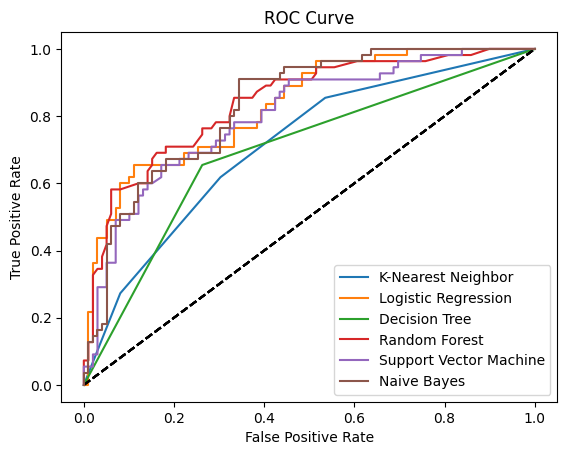

In [841]:
# Roc Curve
def plot_roc_curve(model, model_name, x_test, y_test):
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=model_name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

plt.figure(dpi=100)

models = [knn_model, log_model, dt_model, rf_model, svm_model, nb_model]
model_names = ['K-Nearest Neighbor', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'Naive Bayes']

for model, model_name in zip(models, model_names):
    plot_roc_curve(model, model_name, x_test, y_test)

plt.show()

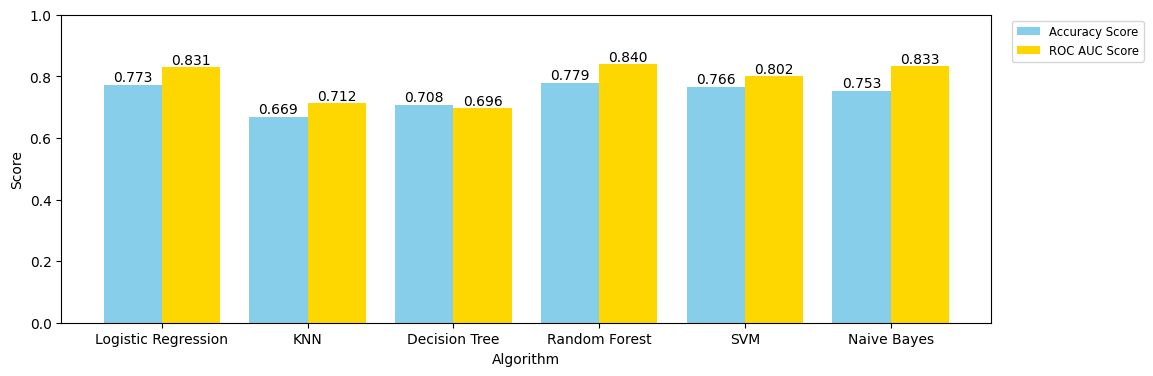

In [842]:
#Compare Algorithm
plt.figure(figsize=(12,4))
plt.ylim([0,1])
x_axis = np.arange(len(method_names))
bars1 = plt.bar(x_axis - 0.2, test_accuracies_scores, 0.4, color='skyblue', label='Accuracy Score')
bars2 = plt.bar(x_axis + 0.2, roc_auc_scores, 0.4, color='gold', label='ROC AUC Score') 
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.xticks(x_axis,method_names)
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.17, 1))
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height(), f'{bar1.get_height():.3f}', 
             ha='center', va='bottom')
    plt.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height(), f'{bar2.get_height():.3f}', 
             ha='center', va='bottom')
plt.show()

In [844]:
#Prediction with Random Forest
input_data = [3,120,96,13,188,40.6,0.256,32]
predictions = rf_model.predict([input_data])[0]
if predictions == 1:
    print("Terkena Diabetes")
else:
    print("Tidak Terkena Diabetes")

Tidak Terkena Diabetes
